In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
%cd "/content/gdrive/My Drive/Colab Notebooks/music-compression"

/content/gdrive/My Drive/Colab Notebooks/music-compression


In [3]:
!pip install pydub

In [0]:
import torch
import numpy as np

from runner.train import Trainer

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [0]:
cuda_flag = True

In [0]:
trainer = Trainer('model_checkpoints/cnn_autoencoder_deep/', batch_size=100, load_from_disk=True, cuda=cuda_flag)

In [7]:
# trainer.train(num_epochs=300)

Epoch:1, Loss:0.1344


KeyboardInterrupt: ignored

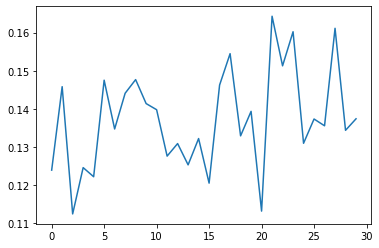

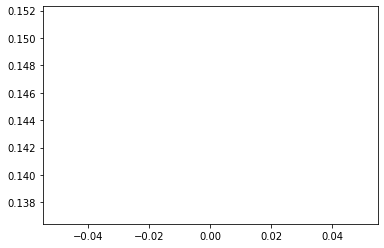

In [8]:
trainer.plot_loss_history(mode='train')
trainer.plot_loss_history(mode='test')

In [0]:
from runner.compression_test import compress_and_regen

In [11]:
model = trainer.model
model.eval()
compress_and_regen('data/sample/061', 'test/061742_14.pt', model, is_cuda=cuda_flag)
model.train()

CNNAutoEncoder(
  (encoder_model): Sequential(
    (conv1): Conv1d(1, 64, kernel_size=(512,), stride=(256,))
    (relu1): ReLU(inplace=True)
    (conv2): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
    (relu2): ReLU(inplace=True)
  )
  (decoder_model): Sequential(
    (convT2): ConvTranspose1d(32, 64, kernel_size=(1,), stride=(1,))
    (reluT2): ReLU(inplace=True)
    (convT1): ConvTranspose1d(64, 1, kernel_size=(512,), stride=(256,))
  )
  (loss_criterion): MSELoss()
)